# DS 3000 - Assignment 6

**Student Name**: David Yu

**Date**: 2/13/25


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: Loading Data (50 pts)
Write python code to answer the questions below and ensure that you round all numeric calculations to 3 decimal places. 

(0pts) Load the attached data into a pandas dataframe: diamonds.csv
This dataset contains the price of diamonds based on various attributes. For more information about the variables, read the description on kaggle.com

In [1]:
import pandas as pd

df = pd.read_csv('diamonds.csv')

## Question 2: 
(5 pts) Select any two variables of your choice and explain its statistical summary, e.g. mean, median, min, max, etc.
Note: you can use the .describe() method from the dataframe to obtain the descriptive statistics, or any suitable approach.


In [3]:
print("Price:")
print(df['price'].describe())

print("\nCarat:")
print(df['carat'].describe())

Price:
count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

Carat:
count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64


Both price and carat are right-skewed. As we can see, the mean is higher than the median, indicating a right skew. Their standard deviations are also big, showing that there is a lot of variation in price and carats. The data also shows a wide range of price and carats.

## Question 3: 
(5 pts) Create a bar chart that shows the frequency of diamonds grouped by cut. Explain the chart.


In [10]:
import matplotlib.pyplot as plt

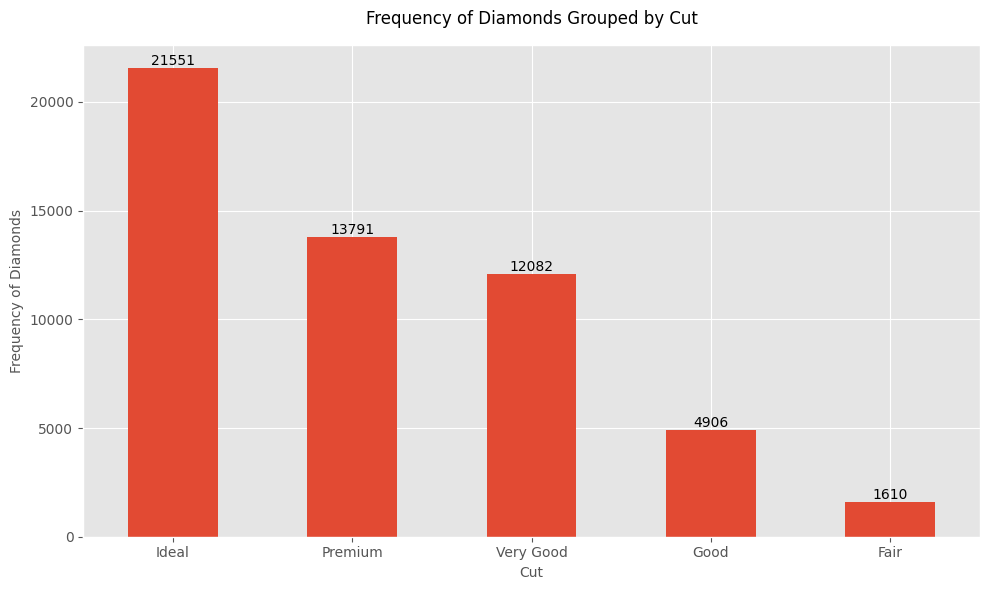

In [17]:
plt.figure(figsize=(10, 6))
df['cut'].value_counts().plot(kind='bar')

# Customize the plot
plt.title('Frequency of Diamonds Grouped by Cut', fontsize=12, pad=15)
plt.xlabel('Cut', fontsize=10)
plt.ylabel('Frequency of Diamonds', fontsize=10)

for i, v in enumerate(df['cut'].value_counts()):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.xticks(rotation=360)
plt.tight_layout()

plt.show()

This bar chart groups different cuts with the frequency of diamonds. The chart shows that ideal cut diamonds are the most frequent in the dataset, followed behind by premium and very good. Good and fair cuts are the least frequent cuts. The distribution shows a clear bias towards higher quality cuts, which suggests that diamond manufacturers prioritize achieving better cuts. The low number of fair and good cut diamonds might indicate either quality control in production or market selection. Better cuts usually demand higher prices and are more desireable.

## Question 4: 
(5 pts) Create a scatterplot that shows the relationship between carat and price. Explain the chart and comment on the relationship between the variables.

In [20]:
import numpy as np

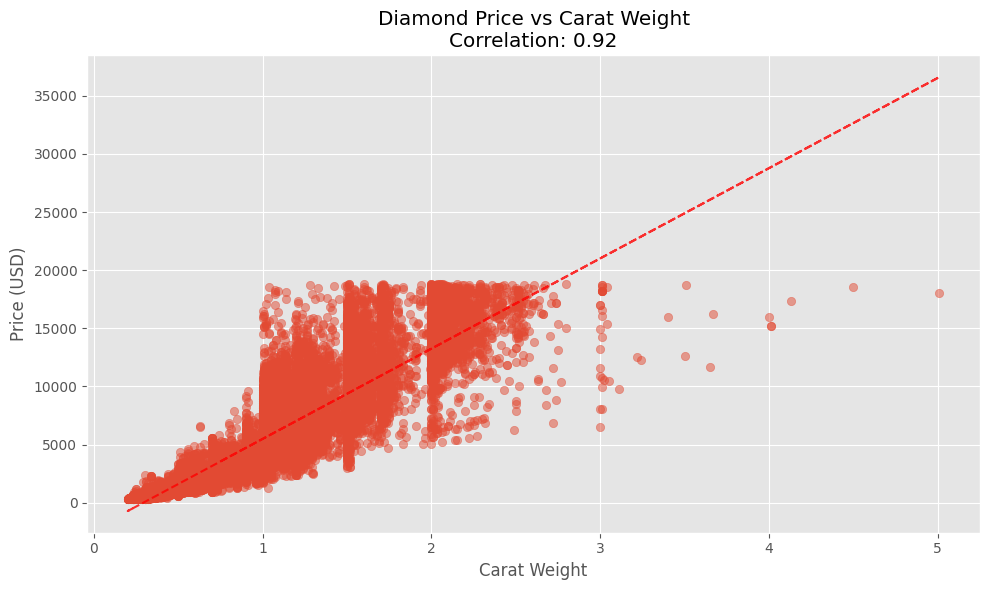

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(df['carat'], df['price'], alpha=0.5)

correlation = df['carat'].corr(df['price'])

plt.xlabel('Carat Weight')
plt.ylabel('Price (USD)')
plt.title('Diamond Price vs Carat Weight\n' + f'Correlation: {correlation:.2f}')

z = np.polyfit(df['carat'], df['price'], 1)
p = np.poly1d(z)
plt.plot(df['carat'], p(df['carat']), "r--", alpha=0.8)

plt.tight_layout()

plt.show()

This chart shows the correlation between carat weight and price. The red dashed line shows the positive relationship between carat weight and price. The chart shows a strong positive correlation between carat weight and price. As carat weight increases, the price increases. The relationship between carat weight and price appears to be non-linear as the price increases more rapidly with each additional carat weight.

## Question 5: 
(10 pts) Calculate the Pearson Correlation coefficient of carat and price. Explain the results and discuss the strength of the correlation.

In [39]:
def annualAdmissionsByCounty(year):
    """
    Filters the dataset for the specified year, calculates the proportion of
    admissions for each county, and displays the Top 10 counties in a bar chart.
    """
    df_year = df[df['Year'] == year]
    
    county_sums = df_year.groupby('County of Program Location')['Admissions'].sum()
    
    total_admissions = county_sums.sum()
    county_proportions = (county_sums / total_admissions) * 100
    
    top10 = county_proportions.sort_values(ascending=False).head(10)
    
    plt.figure(figsize=(8, 6))
    bars = plt.bar(top10.index, top10.values, color='teal')
    plt.title(f"Top 10 Counties by Proportion of Admissions - {year}")
    plt.ylabel("Percentage of Total Admissions (%)")
    plt.xticks(rotation=45, ha='right')
    
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2, 
            height, 
            f"{height:.1f}%", 
            ha='center', 
            va='bottom',
            fontsize=9
        )
    
    plt.tight_layout()
    plt.show()

/var/folders/7d/kwt0yt6x3c37s1k0wbtcbt0w0000gn/T/ipykernel_8517/991619148.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  county_sums = df_year.groupby('County of Program Location')['Admissions'].sum()


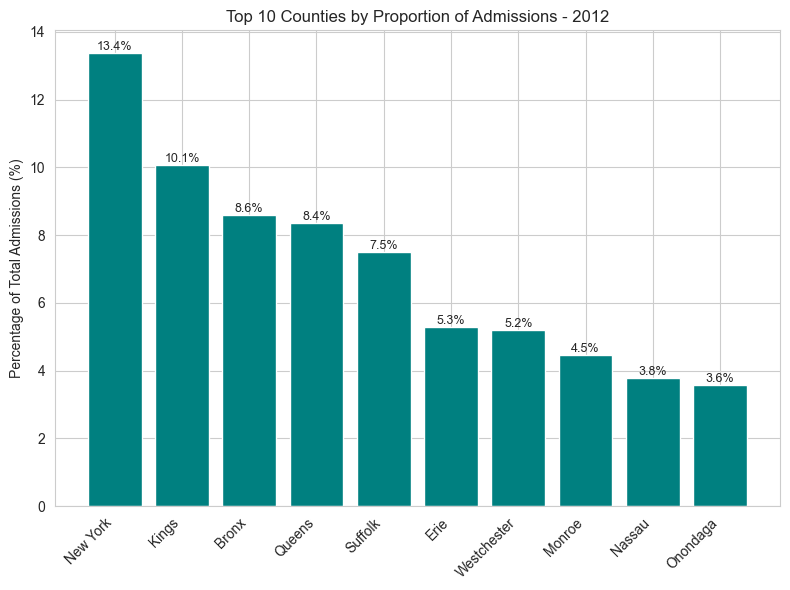

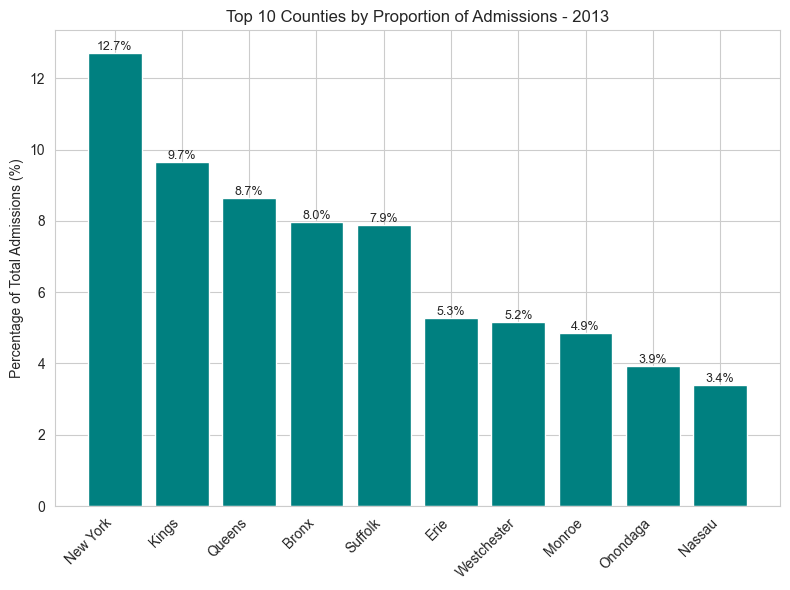

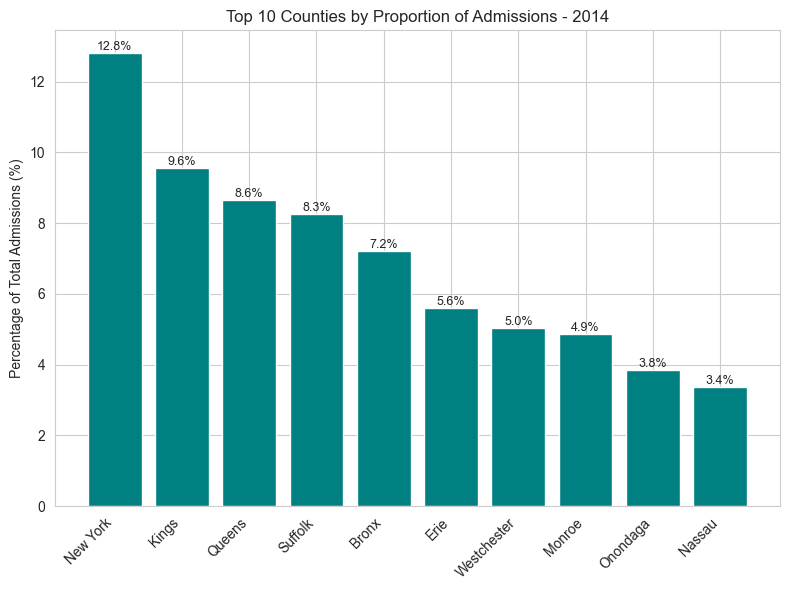

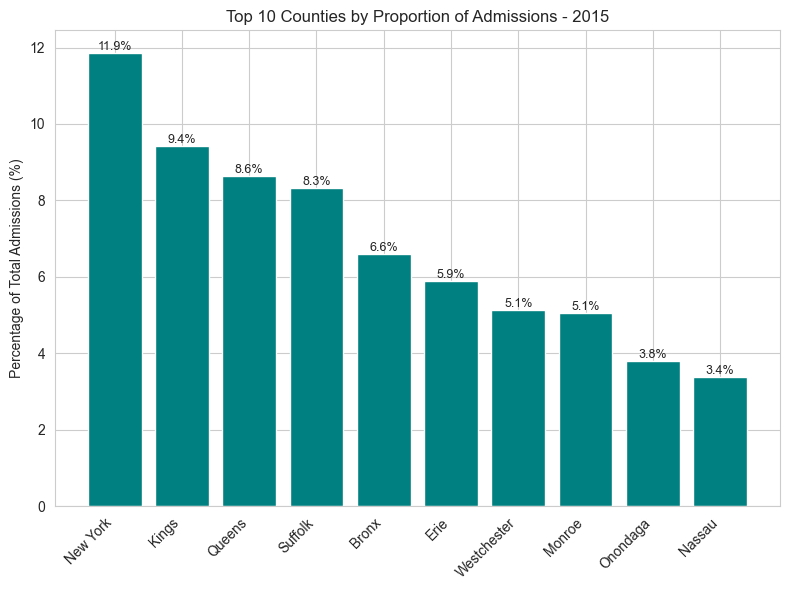

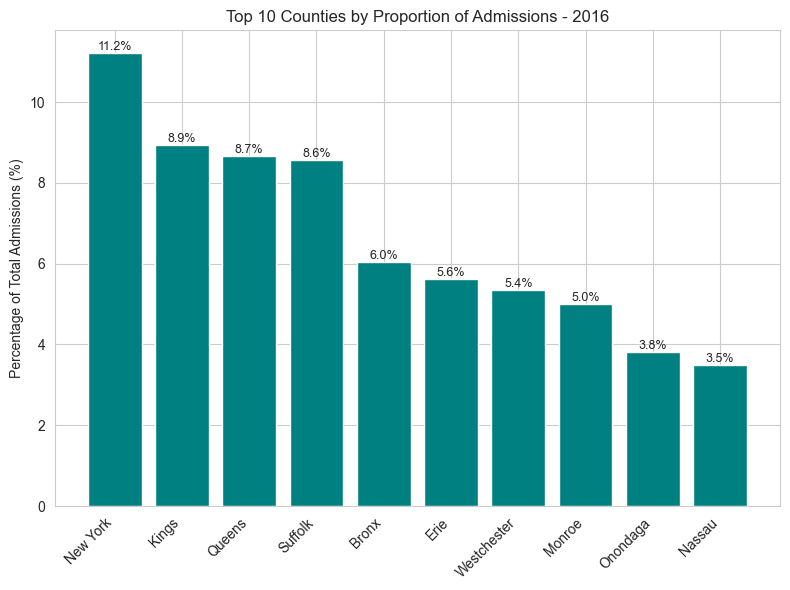

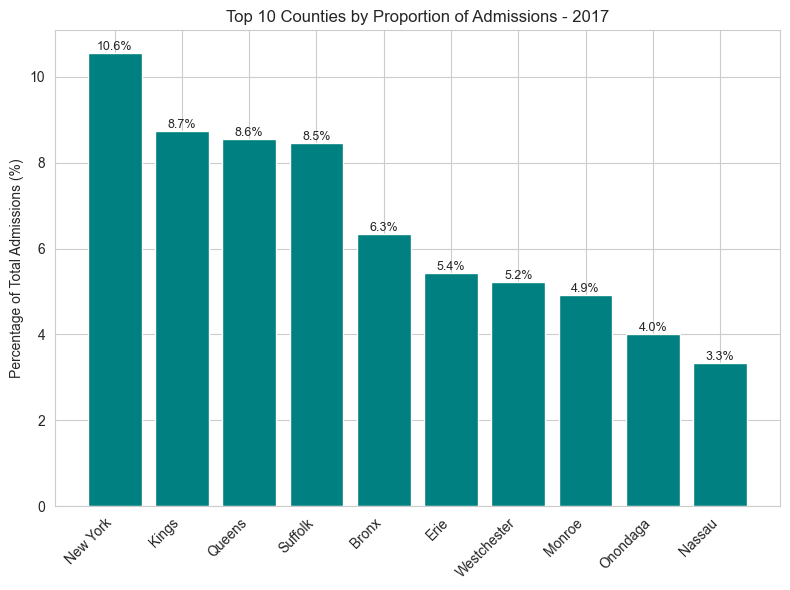

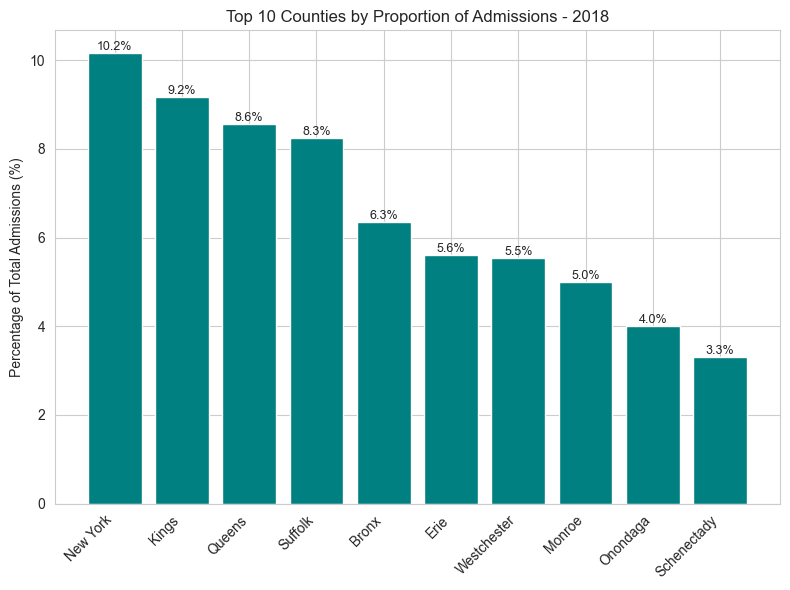

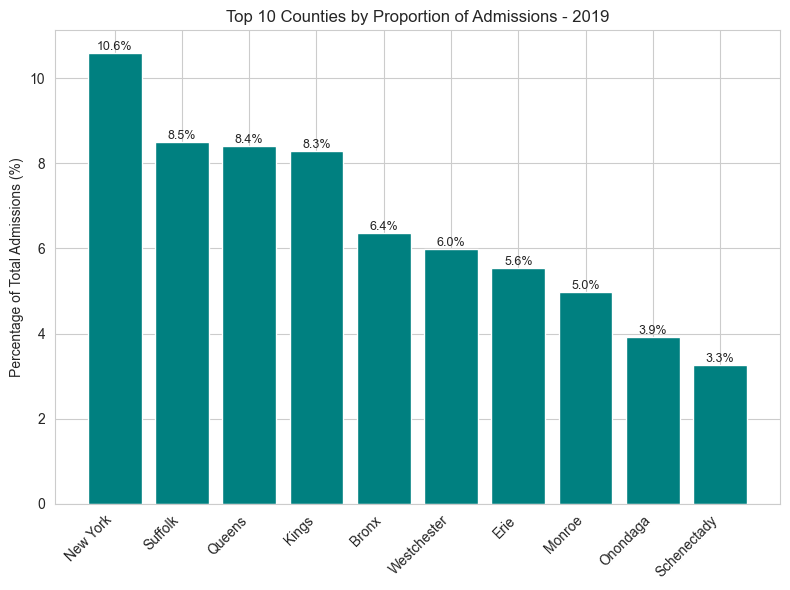

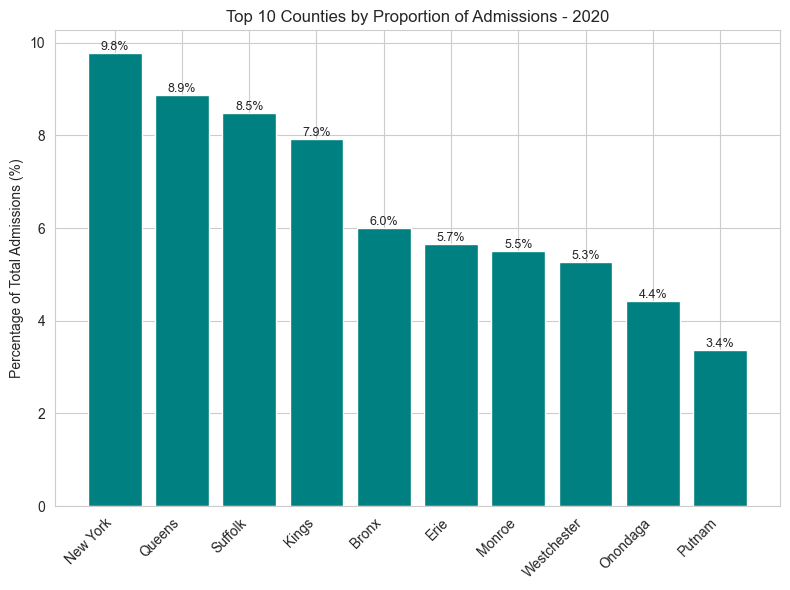

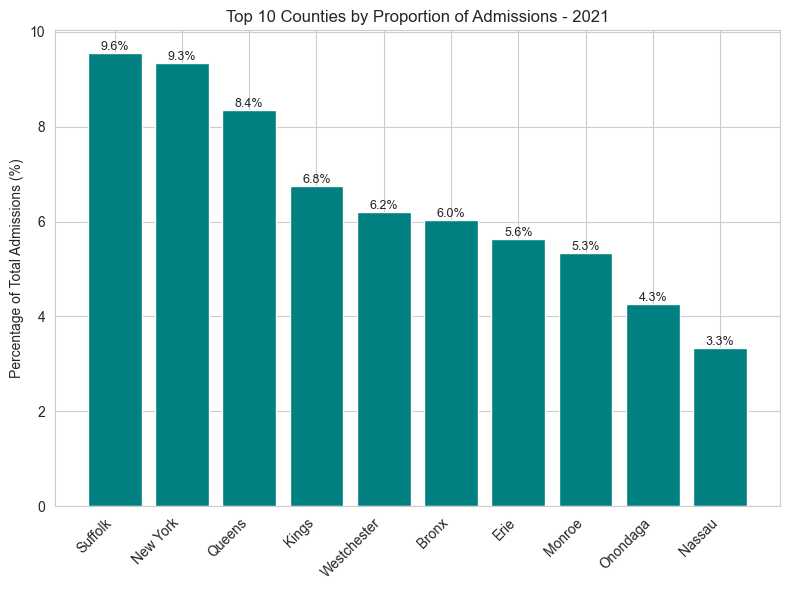

In [41]:
for y in range(2012, 2022):
    annualAdmissionsByCounty(y)


### Analysis of results
- New York started as the dominant leader with 13.4% of admissions in 2012, but steadily declined over the decade to 9.3% in 2021, eventually losing its top position to Suffolk County.
- Suffolk moved from 7.5% and fifth place in 2012 to becoming the top county with 9.6% of admissions in 2021.
- The gap between the highest and lowest percentages narrowed significantly over the decade. In 2012, there was a wide spread from 13.4% to 3.6% (a 9.8% difference), but by 2021, this range had shrunk to just 6.3% (from 9.6% to 3.3%). This suggests a more equal distribution of admissions across counties over time.

## Question 6:
(10 pts) Filter the data, and extract all admissions to the various “Rehab” facilities; i.e. you should perform a case-insensitive match for all facilities that include the word rehab, rehabilitation, etc. Using the filtered data, identify which substance is the most prominent among each age group. Visualize and explain the results.

/var/folders/7d/kwt0yt6x3c37s1k0wbtcbt0w0000gn/T/ipykernel_8517/348545770.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_rehab.groupby(['Age Group', 'Primary Substance Group'])['Admissions'].sum().reset_index()
/var/folders/7d/kwt0yt6x3c37s1k0wbtcbt0w0000gn/T/ipykernel_8517/348545770.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  idx_max = grouped.groupby('Age Group')['Admissions'].idxmax()


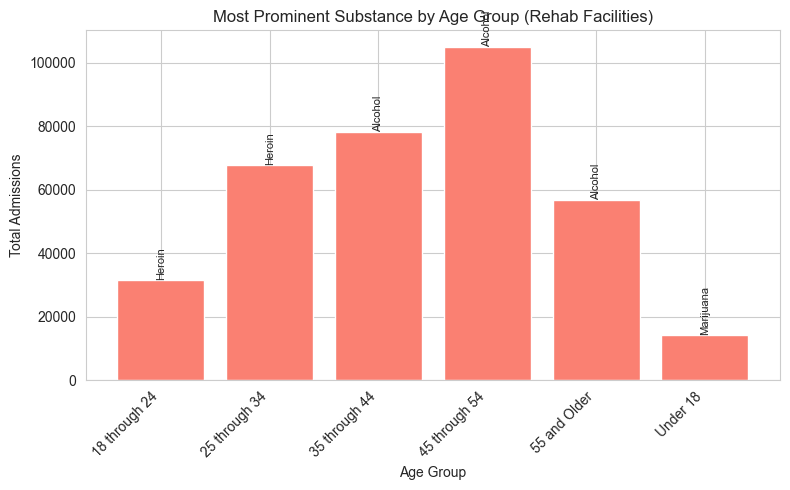

In [44]:
df_rehab = df[df['Service Type'].str.contains('rehab|rehabilitat', case=False, na=False)]

# Group by Age Group and Substance
grouped = df_rehab.groupby(['Age Group', 'Primary Substance Group'])['Admissions'].sum().reset_index()

# For each age group, find the substance with the maximum admissions
idx_max = grouped.groupby('Age Group')['Admissions'].idxmax()
top_substance_by_age = grouped.loc[idx_max].sort_values('Age Group')

def plotTopSubstancesByAge(df_top):
    """
    Plots a bar chart of the top substance for each age group in rehab facilities
    """
    plt.figure(figsize=(8, 5))
    
    df_top_sorted = df_top.sort_values('Age Group')
    
    bars = plt.bar(df_top_sorted['Age Group'], df_top_sorted['Admissions'], color='salmon')
    plt.title("Most Prominent Substance by Age Group (Rehab Facilities)")
    plt.xlabel("Age Group")
    plt.ylabel("Total Admissions")

    for bar, substance in zip(bars, df_top_sorted['Primary Substance Group']):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, 
                 substance, 
                 ha='center', va='bottom', rotation=90, fontsize=8)

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plotTopSubstancesByAge(top_substance_by_age)

### Analysis of results:
This graph shows the most prominent substance requiring rehab treatment across different age groups, along with the total number of admissions for each group.
- Age group of 45 through 54 has the most admissions with alcohol being the main substance that requires rehab treatment.
- Age groups of 25 through 34 and 35 through 44 make up a substantial portion of admissions. However, heroin is the primary substance for age group 25 through 34 whereas alcohol is the primary substance for age group 35 through 44.
- Age group of under 18 don't have many admissions and their primary substance is marijuana. 

## Question 7:
(10 pts) Using the filtered “rehab” data from Question 6, conduct a detailed analysis to identify patterns in admissions to rehabilitation facilities across 7 counties. For example, are admissions for certain substance groups more prevalent etc. Provide a comprehensive explanation of your observations with supporting visualizations.

/var/folders/7d/kwt0yt6x3c37s1k0wbtcbt0w0000gn/T/ipykernel_8517/3780163115.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_rehab.groupby(['County of Program Location', 'Primary Substance Group'])['Admissions']
/var/folders/7d/kwt0yt6x3c37s1k0wbtcbt0w0000gn/T/ipykernel_8517/3780163115.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_substance_pivot_top7.drop(columns='Total', inplace=True)


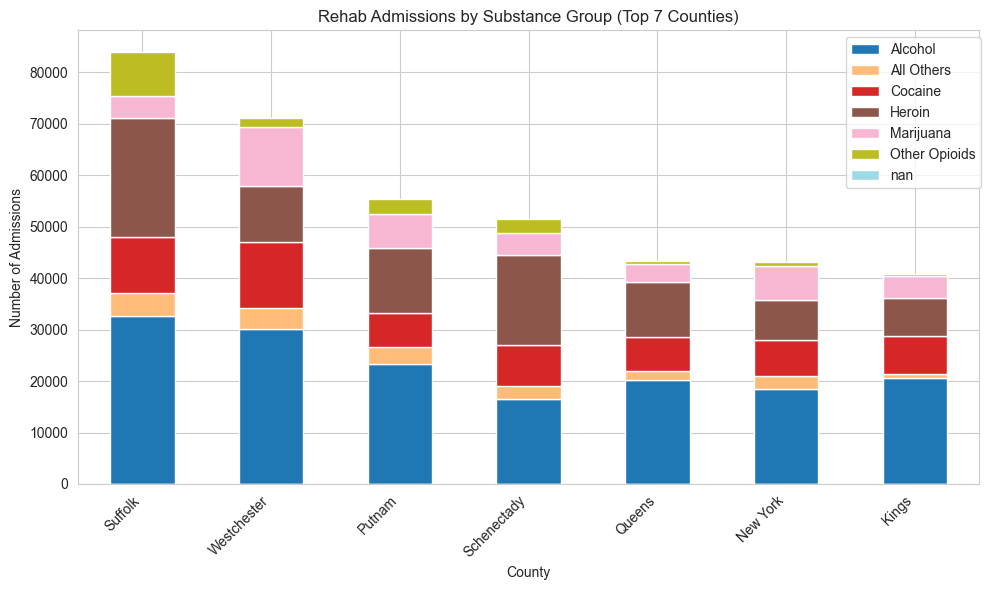

In [49]:
county_substance = (
    df_rehab.groupby(['County of Program Location', 'Primary Substance Group'])['Admissions']
    .sum()
    .reset_index()
)

county_substance_pivot = county_substance.pivot(
    index='County of Program Location',
    columns='Primary Substance Group',
    values='Admissions'
).fillna(0)

# Sort counties by total rehab admissions (descending)
county_substance_pivot['Total'] = county_substance_pivot.sum(axis=1)
county_substance_pivot.sort_values('Total', ascending=False, inplace=True)

# Select Top 7 counties
county_substance_pivot_top7 = county_substance_pivot.head(7)
county_substance_pivot_top7.drop(columns='Total', inplace=True)

ax = county_substance_pivot_top7.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='tab20'
)

plt.title("Rehab Admissions by Substance Group (Top 7 Counties)")
plt.xlabel("County")
plt.ylabel("Number of Admissions")
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.01, 1.0))
plt.tight_layout()
plt.show()

### Analysis of results:
- The colored segments that make up each bar represent the different substances that drive admissions in rehab facilities. The total height of each bar reflects overall rehab admissions in that county.
- Alcohol is the most common substance for rehab admissions in the top 7 counties. 
- Substances like cocaine and marijuana show up more prominently in certain counties, which can reflect a local difference in substance uses.
- Some counties have a higher total rehab admissions, which could be due to a larger population, more treatment centers, or more supply of a substance in the area.
- Possible explanations can be whether a county is more urban or more rural can affect their numbers and substance use-trends.
- Demographics, policy, and availability of services can also influence both the total substance use and total admissions.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
